# QUIZ 5 - Object Recognition: BoF vs ConvNetsTarefa

### Grupo: Luiz Gontijo, Marcos Vinicius, Matheus Pimenta

O objetivo deste Quiz é implementar e comparar duas maneiras de reconhecimento de objetos. 

In [1]:
import numpy as np
import pickle
import cv2 as cv
from matplotlib import pyplot as plt
import scipy.misc as smp

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
batch1 = unpickle("./cifar-10-python/cifar-10-batches-py/data_batch_1")
# for key in batch1:
#     print(key, '->', batch1[key])



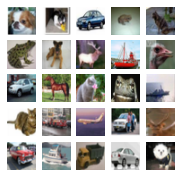

In [4]:
X = batch1[b"data"] 
Y = batch1[b'labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])


### Bag of Features

1. Dataset aleatório
2. SIFT pra cada uma das imagens
3. Comparar descritores do SIFT e separar em grupos (clusters)
4. Criar um representante para cada grupo (média do grupo)
5. Classificar todas as imagens (data e label)
    data = [[1,2,3],[1,3,5],...] | label = [0,1,2,...]
6. Passar pros modelos de aprendizado


⚫ It is composed of 4 steps
    1. Feature Extraction
    2. Visual Dictionary Creation
    3. Vector Quantization
    4. Image Representation

In [5]:
def get_SIFT_desc(img):
    sift = cv.SIFT_create()
    keypoints = sift.detect(img,None)
    k, d = sift.compute(img, keypoints)
    return k, d

In [6]:

def get_random_img(dataset):
    X = dataset[b"data"] 
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    i = np.random.choice(range(len(X)))
    return X[i:i+1][0]

32
[<KeyPoint 0x7f9a47809bd0>, <KeyPoint 0x7f9a478096f0>, <KeyPoint 0x7f9a478090f0>, <KeyPoint 0x7f9a47809840>, <KeyPoint 0x7f9a47809a50>, <KeyPoint 0x7f9a47f7e030>, <KeyPoint 0x7f9a47f7e150>, <KeyPoint 0x7f9a467bfba0>, <KeyPoint 0x7f9a467bf420>, <KeyPoint 0x7f9a467bf4e0>, <KeyPoint 0x7f9a467bff60>, <KeyPoint 0x7f9a467bf2d0>, <KeyPoint 0x7f9a467bf780>]
[<KeyPoint 0x7f9a467bf5d0>, <KeyPoint 0x7f9a467bf390>, <KeyPoint 0x7f9a467bf960>, <KeyPoint 0x7f9a846d48d0>, <KeyPoint 0x7f9a467bade0>, <KeyPoint 0x7f9a467babd0>, <KeyPoint 0x7f9a467bab70>, <KeyPoint 0x7f9a467ba720>, <KeyPoint 0x7f9a467ba0c0>, <KeyPoint 0x7f9a467ba9c0>, <KeyPoint 0x7f9a467ba930>, <KeyPoint 0x7f9a467ba810>, <KeyPoint 0x7f9a467ba5d0>]


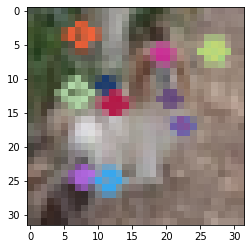

In [10]:
# TESTES
img = get_random_img(batch1)
k, d = get_SIFT_desc(img)
print(k)
copy = img.copy()
copy = cv.drawKeypoints(img,k,copy,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(copy)
plt.show()